<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16484972519995784599, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 473099736289370767
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8945825238469171630
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10849646377927093020
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

LOAD DATASET

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

DATA WRANGLING

In [5]:
x_train.shape


(50000, 32, 32, 3)

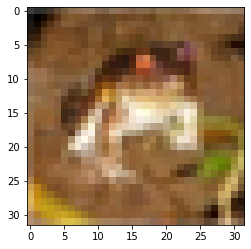

In [6]:
single_image = x_train[0]
plt.imshow(single_image)

In [7]:
x_train[0] # The value are not normalised

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].max()

255

In [9]:
x_train[0].min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)


In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

MODEL CREATION AND EVALUATION

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten


model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))




model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 164us/sample - loss: 1.4242 - acc: 0.4892 - val_loss: 1.2189 - val_acc: 0.5735
Epoch 2/20
50000/50000 [==============================] - 8s 157us/sample - loss: 1.0829 - acc: 0.6212 - val_loss: 1.0760 - val_acc: 0.6163
Epoch 3/20
50000/50000 [==============================] - 8s 159us/sample - loss: 0.9084 - acc: 0.6852 - val_loss: 0.9954 - val_acc: 0.6569
Epoch 4/20
50000/50000 [==============================] - 8s 158us/sample - loss: 0.7898 - acc: 0.7250 - val_loss: 0.9827 - val_acc: 0.6630
Epoch 5/20
50000/50000 [==============================] - 8s 158us/sample - loss: 0.6920 - acc: 0.7585 - val_loss: 0.9434 - val_acc: 0.6840
Epoch 6/20
50000/50000 [==============================] - 8s 163us/sample - loss: 0.5951 - acc: 0.7935 - val_loss: 1.0063 - val_acc: 0.6731
Epoch 7/20
50000/50000 [==============================] - 8s 160us/sample - loss: 0.5146 - acc: 0.8195 - val_l

In [40]:
import pandas as pd
eval = pd.DataFrame(model.history.history)
eval

,loss,acc,val_loss,val_acc
0,1.424153,0.48916,1.218889,0.5735
1,1.082851,0.62122,1.075995,0.6163
2,0.908421,0.68522,0.995407,0.6569
3,0.789776,0.72502,0.982748,0.6630
4,0.692015,0.75846,0.943432,0.6840
5,0.595063,0.79348,1.006276,0.6731
6,0.514556,0.81946,1.078942,0.6695


In [41]:
eval.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

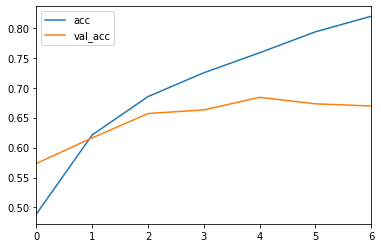

In [42]:
eval[['acc', 'val_acc']].plot()

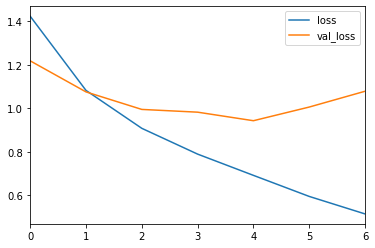

In [43]:
eval[['loss', 'val_loss']].plot()

In [44]:
model.evaluate(x_test,y_cat_test,verbose=2)

10000/10000 - 1s - loss: 1.0789 - acc: 0.6695


[1.078942471885681, 0.6695]

In [0]:
from sklearn.metrics import  classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(x_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1000
           1       0.83      0.75      0.79      1000
           2       0.54      0.59      0.57      1000
           3       0.50      0.51      0.50      1000
           4       0.61      0.60      0.61      1000
           5       0.57      0.52      0.55      1000
           6       0.63      0.85      0.72      1000
           7       0.80      0.65      0.72      1000
           8       0.84      0.75      0.79      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

